In [1]:
%pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
%pip install matplotlib

     ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.0 MB 435.7 kB/s eta 0:00:19
     ---------------------------------------- 0.0/8.0 MB 435.7 kB/s eta 0:00:19
     ---------------------------------------- 0.0/8.0 MB 435.7 kB/s eta 0:00:19
     ---------------------------------------- 0.0/8.0 MB 151.3 kB/s eta 0:00:53
     ---------------------------------------- 0.1/8.0 MB 245.8 kB/s eta 0:00:33
      --------------------------------------- 0.1/8.0 MB 328.2 kB/s eta 0:00:24
      --------------------------------------- 0.1/8.0 MB 328.2 kB/s eta 0:00:24
      --------------------------------------- 0.1/8.0 MB 277.4 kB/s eta 0:00:29
      --------------------------------------- 0.1/8.0 MB 315.4 kB/s eta 0:00:25
     - -------------------------------------- 0.2/8.0 MB 430.1 kB/s eta 0:00:18
     - -------------------------------------- 0.2/8.0 MB 4


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def load_data(folder):
    data = []
    labels = []
    for label, subfolder in enumerate(['control', 'condition']):
        path = os.path.join(folder, subfolder)
        for file in os.listdir(path):
            if file.endswith(".csv"):
                df = pd.read_csv(os.path.join(path, file))
                data.append(df[['timestamp', 'activity']].values)
                labels.append(label)
    return data, labels

data, labels = load_data('data')

In [12]:
from sklearn.preprocessing import StandardScaler

# Assuming 'activity' is the feature and 'timestamp' can be converted to a relevant feature (e.g., hour)
def preprocess_data(data):
    processed_data = []
    for sequence in data:
        df = pd.DataFrame(sequence, columns=['timestamp', 'activity'])
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['hour'] = df['timestamp'].dt.hour
        processed_data.append(df[['hour', 'activity']].values)
    return processed_data

processed_data = preprocess_data(data)

# Normalize the data
scaler = StandardScaler()
for i in range(len(processed_data)):
    processed_data[i] = scaler.fit_transform(processed_data[i])

# Pad sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max(len(seq) for seq in processed_data)
X = pad_sequences(processed_data, maxlen=max_len, dtype='float32', padding='post', truncating='post')
y = np.array(labels)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (X.shape[1], X.shape[2])
model = create_model(input_shape)


c:\Users\vinse\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
# Model Evaluation Section
# Assuming you have the true labels and predictions ready
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions if needed

# Insert the new code here
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='binary')  # Use 'micro', 'macro', 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print the scores
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 205s 95s/step - accuracy: 0.5685 - loss: 0.8502 - val_accuracy: 0.6667 - val_loss: 1.3042
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 178s 69s/step - accuracy: 0.7158 - loss: 2.7075 - val_accuracy: 0.5556 - val_loss: 6.6933
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 181s 68s/step - accuracy: 0.6274 - loss: 5.2263 - val_accuracy: 0.8889 - val_loss: 0.6294
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 177s 69s/step - accuracy: 0.9220 - loss: 0.6698 - val_accuracy: 0.7778 - val_loss: 0.4685
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 206s 92s/step - accuracy: 0.8232 - loss: 1.3439 - val_accuracy: 1.0000 - val_loss: 0.1179
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 293s 103s/step - accuracy: 0.8527 - loss: 1.0003 - val_accuracy: 0.8889 - val_loss: 0.7040
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 186s 69s/step - accuracy: 0.9220 - loss: 0.5471 - val_accuracy: 0.8889 - val_loss: 1.1966
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 185s 68s/step - accuracy: 0.9411 - loss: 0.2634 - val_accuracy: 0.8889 - val_loss

In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
# Model Evaluation Section
# Assuming you have the true labels and predictions ready
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions if needed

# Insert the new code here
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='binary')  # Use 'micro', 'macro', 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print the scores
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Test Accuracy: 0.7273
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Precision: 0.7500
Recall: 0.6000
F1 Score: 0.6667


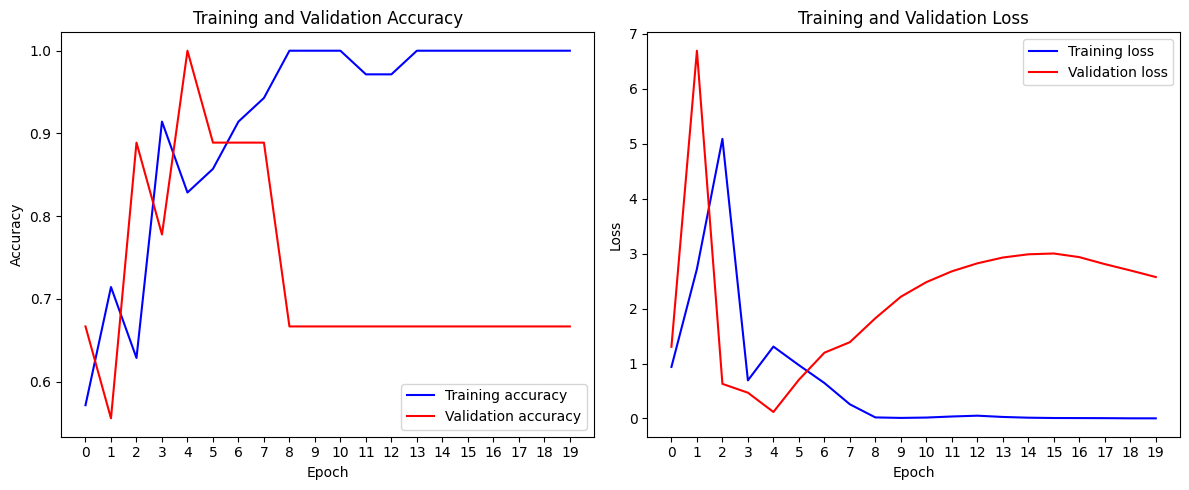

In [17]:
# Plotting accuracy and loss
epochs = range(len(history.history['accuracy']))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, len(epochs), 1))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'b', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(0, len(epochs), 1))
plt.legend()

plt.tight_layout()
plt.show()